Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['data', 'notebooks']
Total Baris Data: 148061
------------------------------
Jumlah Cluster yang Ditemukan (Label > -1): 391
Jumlah Titik Noise/Outliers (Label -1): 13718
------------------------------
Cluster Sizes (Top 5):
Cluster 1: 66252 kota
Cluster 88: 15673 kota
Cluster 54: 10448 kota
Cluster 245: 6434 kota
Cluster 12: 2835 kota


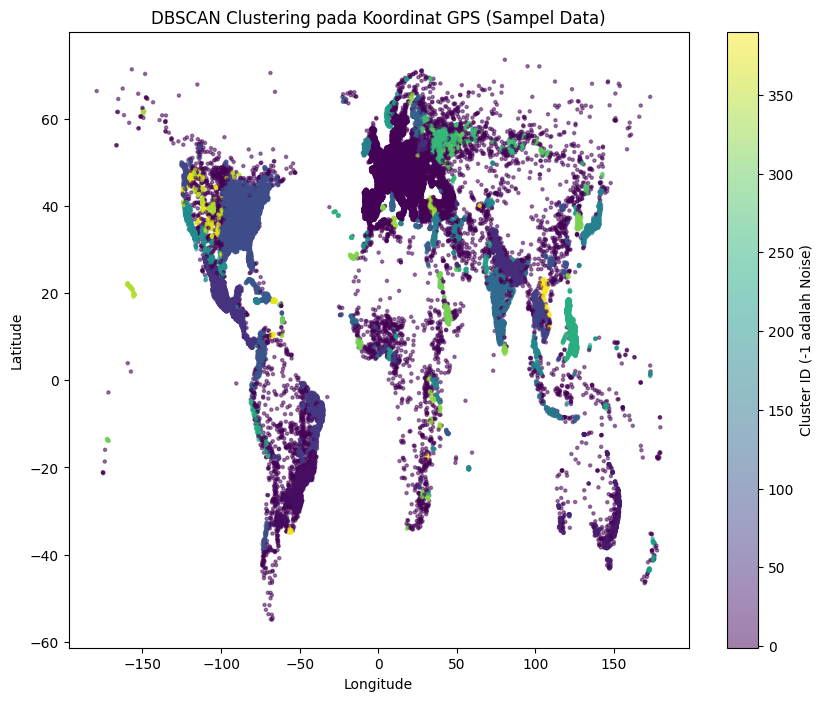

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

import os

path = "/content/gdrive/MyDrive/praktikum_ml/praktikum11"
try:
    print(os.listdir(path))
except FileNotFoundError:
    print(f"Directory not found: {path}")

df = pd.read_csv(f'{path}/data/cities.csv')

# cetak header data (5 baris data) dari file
df.head()

# 1. Pilih Koordinat GPS
X = df[['latitude', 'longitude']]

# 2. Terapkan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
df['dbscan_cluster'] = dbscan.fit_predict(X)

# 3. Analisis Hasil Clustering
n_clusters = len(set(df['dbscan_cluster'])) - (1 if -1 in df['dbscan_cluster'].values else 0)

n_noise = list(df['dbscan_cluster']).count(-1)

print(f"Total Baris Data: {len(df)}")
print("-" * 30)
print(f"Jumlah Cluster yang Ditemukan (Label > -1): {n_clusters}")
print(f"Jumlah Titik Noise/Outliers (Label -1): {n_noise}")
print("-" * 30)

# Menampilkan 5 Cluster Terbesar
cluster_counts = Counter(df['dbscan_cluster'])
if -1 in cluster_counts:
    del cluster_counts[-1]

print("Cluster Sizes (Top 5):")
for cluster_id, count in cluster_counts.most_common(5):
    print(f"Cluster {cluster_id}: {count} kota")

# 4. Visualisasi (Opsional)
plt.figure(figsize=(10, 8))
sample_df = df.sample(n=50000, random_state=42) if len(df) > 50000 else df
plt.scatter(sample_df['longitude'], sample_df['latitude'], c=sample_df['dbscan_cluster'], cmap='viridis', s=5, alpha=0.5)
plt.title('DBSCAN Clustering pada Koordinat GPS (Sampel Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster ID (-1 adalah Noise)')
plt.show()